In [1]:
push!(LOAD_PATH, "../../lib/")
include("utils.jl")

cdf_rnr (generic function with 1 method)

In [2]:
using NaCsData
import NaCsCalc.Format: Unc

In [3]:
using LsqFit
using PyPlot

In [4]:
rnr = NaCsData.calc_survival("data/2017-02-14.csv");

In [5]:
fitx = rnr[1];
fity = rnr[2][:, 2];
fitw = rnr[3][:, 2];

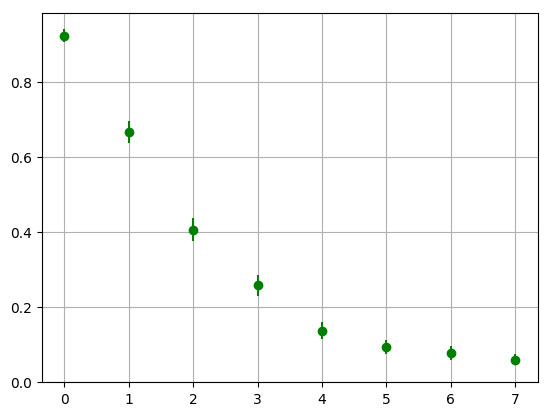

In [6]:
errorbar(fitx * 1e6, fity, fitw, fmt="go")
grid()

In [7]:
function gen_model(ωs, E)
    function model(x, p)
        scale = p[1]
        kT = p[2] # in uK
        return scale .* cdf_rnr.(kT * 20e3, x, (ωs,), E)
    end
end

gen_model (generic function with 1 method)

In [8]:
model = gen_model((2π * 61e3, 2π * 390e3, 2π * 510e3), 46e6)

model (generic function with 1 method)

In [9]:
fit = curve_fit(model, fitx, fity, 1 ./ (fitw + 0.01), [0.9, 40.0]);

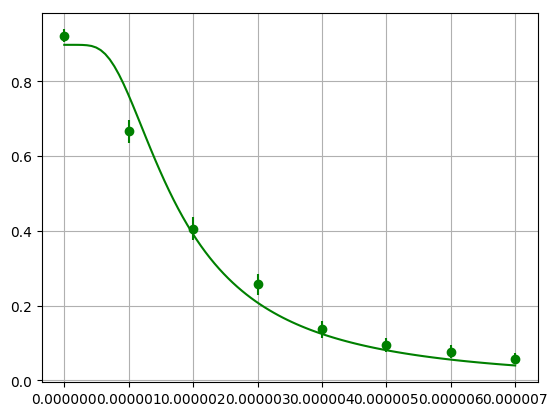

In [10]:
plotx = linspace(minimum(fitx), maximum(fitx), 100)

plot(plotx, model(plotx, fit.param), "g")
errorbar(fitx, fity, fitw, fmt="go")

grid()

In [11]:
sigma = estimate_errors(fit, 0.95)

2-element Array{Float64,1}:
  0.0640192
 37.0478   

In [12]:
Unc.(fit.param, sigma)

2-element Array{NaCsCalc.Format.Unc{Float64},1}:
 0.898(64)
 125(37)  